In [1]:
from psf_constants import TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          PSF_TRAIN_FILE_SUFFIXES, \
                          NUMPY_SUFFIX, \
                          TRANSFER_MATRIX_42_MODES, \
                          TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TRAIN_2M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          VALIDATION_2M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          TEST_2M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          TRAIN_5M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          VALIDATION_5M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          TEST_5M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          TRAIN_9M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          VALIDATION_9M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          TEST_9M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          TRAIN_14M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          VALIDATION_14M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          TEST_14M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          TRAIN_20M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX,\
                          VALIDATION_20M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          TEST_20M_ZERNIKE_PSF_LP_MODES_FILE_PATH

from data_utils import generate_zernike_psf_complex_fields,\
                       generate_psf_complex_fields, \
                       compute_output_fluxes_from_complex_field, \
                       compute_output_fluxes_from_complex_field_using_arbitrary_transfer_matrix, \
                       compute_lp_modes_from_complex_field

In [2]:
PATHS_DICTIONARY = {
    "TR2": [TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, 
            TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            TRAIN_2M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX,
            [2, 3]],
    "V2": [VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           VALIDATION_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
           VALIDATION_2M_ZERNIKE_PSF_LP_MODES_FILE_PATH,
           [2, 3]],
    "TS2": [TEST_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            TEST_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
            TEST_2M_ZERNIKE_PSF_LP_MODES_FILE_PATH,
            [2, 3]],
    "TR5": [TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, 
            TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            TRAIN_5M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX,
            [2, 3, 4, 5, 6]],
    "V5": [VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           VALIDATION_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
           VALIDATION_5M_ZERNIKE_PSF_LP_MODES_FILE_PATH,
           [2, 3, 4, 5, 6]],
    "TS5": [TEST_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            TEST_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
            TEST_5M_ZERNIKE_PSF_LP_MODES_FILE_PATH,
            [2, 3, 4, 5, 6]],
    "TR9": [TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, 
            TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            TRAIN_9M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, 
            [2, 3, 4, 5, 6, 7, 8, 9, 10]]
}

# Train data

In [3]:
for dataset_name, ds_info in PATHS_DICTIONARY.items():
    print(f"Generating {dataset_name}")
    psf_path = ds_info[0]
    flux_path = ds_info[1]
    zernike_modes = len(ds_info[2])
    print(psf_path)
    print(flux_path)
    print(ds_info[2])
    
    if dataset_name.startswith("TR"):
        print()
        for fnumber in PSF_TRAIN_FILE_SUFFIXES:
            print("    Generating PSFs")
            print(f"    Train Subfile {fnumber}")
            complex_fields_filepath = f"{psf_path}{fnumber}{NUMPY_SUFFIX}"
            generate_zernike_psf_complex_fields(complex_fields_filepath, 
                                                zernike_modes=zernike_modes)
            print("    Generating Fluxes")
            output_fluxes_filepath = f"{flux_path}{fnumber}{NUMPY_SUFFIX}"
            compute_output_fluxes_from_complex_field(complex_fields_filepath, 
                                                     output_fluxes_filepath)
    else:
        print("    Generating PSFs")
        generate_zernike_psf_complex_fields(psf_path, 
                                            zernike_modes=zernike_modes)
        print("    Generating Fluxes")
        compute_output_fluxes_from_complex_field(psf_path, 
                                                 flux_path)

Generating TR2
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeComplexFields/TrainData/2M_zernike_complex_fields
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/2M_zernike_output_fluxes
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/LPModesFromZernikePSF/TrainData/2M_lp_modes_from_zernike_psf

    Generating PSFs
    Train Subfile 00
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeComplexFields/TrainData/2M_zernike_complex_fields00.npy already exists
    Generating Fluxes
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/2M_zernike_output_fluxes00.npy already exists
    Generating PSFs
    Train Subfile 01
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeComplexFields/TrainData/2M_zernike_complex_fields01.npy already exists
    Generating Flux

### Compute LP modes and Output fluxes

Generating TR2
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeComplexFields/TrainData/2M_zernike_complex_fields
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/PL42_2M_zernike_output_fluxes
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/LPModesFromZernikePSF/TrainData/PL42_2M_lp_modes_from_zernike_psf

    Generating LP modes
    Train Subfile 00
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/PL42_2M_zernike_output_fluxes00.npy already exists
    Generating LP modes
    Train Subfile 01
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/PL42_2M_zernike_output_fluxes01.npy already exists
    Generating LP modes
    Train Subfile 02
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/PL42_2M_zernike_ou

/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:208: RuntimeWarning: invalid value encountered in divide
  field_sin = field_sin / np.sqrt(np.sum(field_sin**2))


    Generating LP modes
    Train Subfile 05
Computing /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/PL42_2M_zernike_output_fluxes05.npy
Total number of unique modes found: 42
    Generating LP modes
    Train Subfile 06
Computing /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/PL42_2M_zernike_output_fluxes06.npy
Total number of unique modes found: 42
Generating V2
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeComplexFields/ValidationData/2M_zernike_complex_fields07.npy
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/ValidationData/PL42_2M_zernike_output_fluxes07.npy
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/LPModesFromZernikePSF/TrainData/PL42_2M_lp_modes_from_zernike_psf
Generating TS2
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFRecon

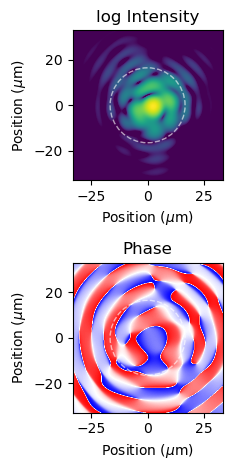

In [4]:
for dataset_name, ds_info in PATHS_DICTIONARY.items():
    print(f"Generating {dataset_name}")
    psf_path = ds_info[0]
    flux_path = ds_info[1]
    lp_path = ds_info[2]
    print(psf_path)
    print(flux_path)
    print(lp_path)
    
    if dataset_name.startswith("TR"):
        print()
        for fnumber in PSF_TRAIN_FILE_SUFFIXES:
            print("    Generating LP modes")
            print(f"    Train Subfile {fnumber}")
            
            complex_fields_filepath = f"{psf_path}{fnumber}{NUMPY_SUFFIX}"
            lp_coeffs_filepath = f"{lp_path}{fnumber}{NUMPY_SUFFIX}"
            output_flux_filepath = f"{flux_path}{fnumber}{NUMPY_SUFFIX}"
            compute_output_fluxes_from_complex_field_using_arbitrary_transfer_matrix(complex_fields_filepath, 
                                                                                     lp_coeffs_filepath,
                                                                                     output_flux_filepath,
                                                                                     TRANSFER_MATRIX_42_MODES
                                                                                     )

### Compute LP Modes

In [3]:
from data_utils import compute_lp_modes_from_complex_field

In [ ]:
for dataset_name, ds_info in PATHS_DICTIONARY.items():
    print(f"Generating {dataset_name}")
    psf_path = ds_info[0]
    lp_path = ds_info[2]
    print(psf_path)
    print(lp_path)
    
    if dataset_name.startswith("TR"):
        print()
        for fnumber in PSF_TRAIN_FILE_SUFFIXES:
            print("    Generating LP modes")
            print(f"    Train Subfile {fnumber}")
            
            complex_fields_filepath = f"{psf_path}{fnumber}{NUMPY_SUFFIX}"
            output_lp_filepath = f"{lp_path}{fnumber}{NUMPY_SUFFIX}"
            compute_lp_modes_from_complex_field(complex_fields_filepath, 
                                                     output_lp_filepath)
    else:
        print("    Generating LP modes")
        compute_lp_modes_from_complex_field(psf_path, 
                                            lp_path)

Generating TR2
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeComplexFields/TrainData/2M_zernike_complex_fields
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/LPModesFromZernikePSF/TrainData/2M_lp_modes_from_zernike_psf

    Generating LP modes
    Train Subfile 00
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/LPModesFromZernikePSF/TrainData/2M_lp_modes_from_zernike_psf00.npy already exists
    Generating LP modes
    Train Subfile 01
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/LPModesFromZernikePSF/TrainData/2M_lp_modes_from_zernike_psf01.npy already exists
    Generating LP modes
    Train Subfile 02
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/LPModesFromZernikePSF/TrainData/2M_lp_modes_from_zernike_psf02.npy already exists
    Generating LP modes
    Train Subfile 03
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PS

/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:208: RuntimeWarning: invalid value encountered in divide
  field_sin = field_sin / np.sqrt(np.sum(field_sin**2))


    Generating LP modes
    Train Subfile 04
Computing /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/LPModesFromZernikePSF/TrainData/5M_lp_modes_from_zernike_psf04.npy
Total number of unique modes found: 19


In [6]:
a = np.load('milp.npy')

In [9]:
a[0][1]

array([-43.53086  ,  54.274242 , -47.306564 , -24.276787 ,  19.214136 ,
        34.403175 , -46.10837  ,  -0.3585613,  15.258958 , -18.186958 ,
       -26.630129 ,  -2.8841772,   2.4309855,  11.637419 ,   2.4765084,
        -6.686699 ,   6.1267924,   1.4197931,   5.834133 ], dtype=float32)

In [1]:
import numpy as np
from plot_utils import plot_amplitude_phase_intensity


v = np.load(VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
plot_amplitude_phase_intensity(v[0], log_scale=False, title=f"{9} zernike terms PSF", plot=True)
plot_amplitude_phase_intensity(v[1], log_scale=False, title=f"{9} zernike terms PSF", plot=True)


NameError: name 'VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH' is not defined